In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn import metrics

from sklearn import preprocessing

os.chdir("C:/Users/Ma/Desktop/document/企业经营退出风险预测/analysis")

data_train = pd.read_csv('evaluation_public.csv',encoding='gb2312')


In [4]:
data_train.head()

,EID,FORTARGET,PROB
0,350,0,0.101688
1,562,0,0.171744
2,632,0,0.124908
3,750,0,0.230737
4,823,0,0.335911


# 网格搜索法调整参数

In [ ]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
# from sklearn.metrics import f1_score
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

#---------------------------------------------------------读取数据集---------------------------------------------------#
data_train = pd.read_csv('data_train.csv',encoding='gb2312')
targets = data_train['TARGET']
train_data = data_train.drop(labels=['TARGET'],axis=1)
# ------------------------------------------------------- 划分样本集----------------------------------------------------#
train_x,test_x,train_y,test_y = train_test_split(train_data,targets,test_size=0.5,random_state=66)
#--------------------------------------------------------设置参数&交叉验证----------------------------------------------#
# -------------------------------------------------------XGBoost--------------------------------------------------------#
# param = {'n_estimators':[i for i in range(800,1400,50)],
        # 'learning_rate':[i/100 for i in range(1,20,2)]}
# grid_search = GridSearchCV(XGBClassifier(scale_pos_weight=4,nthread=-1,seed=6,max_depth=3,min_child_weight=6,
                        # gamma=0,subsample=0.9,colsample_bytree=0.9,reg_alpha=8),
                    # cv=5,param_grid=param,n_jobs=20,scoring='roc_auc')
# grid_search.fit(train_x,train_y)

#-------------------------------------------------------RandmForest-----------------------------------------------------#
# print("randmforest results:\n")
# param = {'oob_score':[True,False]}
# grid_search = GridSearchCV(RandomForestClassifier(n_estimators=1000,max_depth=19,criterion='entropy',
#                                                   max_features='sqrt',min_samples_split=15),
#                     cv=5,param_grid=param,n_jobs=-1,scoring='roc_auc')
# grid_search.fit(train_x,train_y)

#----------------------------------------------------------GBDT---------------------------------------------------------#
print("GradientBoostingClassifier results:\n")
param = {'n_estimators':[i for i in range(400,900,100)],
        'learning_rate':[i/100 for i in range(5,15,2)]}
grid_search = GridSearchCV(GradientBoostingClassifier(n_estimators=600,loss = 'exponential',max_depth=4,min_samples_split=10,
                        min_weight_fraction_leaf=0.01,subsample=0.9,learning_rate=0.07),
                    cv=5,param_grid=param,n_jobs=-1,scoring='roc_auc')
grid_search.fit(train_x,train_y)


# ------------------------------------------------最佳参数在验证集上的结果----------------------------------------------#
pre_y = grid_search.predict_proba(test_x)[:,1]
pre_y_categ = grid_search.predict(test_x)
# ----------------------------------------------------计算auc,f1-score--------------------------------------------------#
fpr, tpr, thresholds = metrics.roc_curve(test_y, pre_y)
auc=metrics.auc(fpr, tpr)
f1 = metrics.f1_score(test_y,pre_y_categ)
print("AUC得分为：")
print(auc)
print('f1-score为：')
print(f1)
#-----------------------------------------------------打印结果-----------------------------------------------------------#
print("Best parameters set found on development set:")
print()
print(grid_search.best_params_)
print("best_estimator_")
print(grid_search.best_estimator_)
print('grid_scores_:')
print(grid_search.grid_scores_)
print('best_score_')
print(grid_search.best_score_)
#----------------------------------------------------------------------------------------------------------#

# XGBoost

In [1]:
from xgboost.sklearn import XGBClassifier
# from sklearn.metrics import f1_score
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import PolynomialFeatures

targets = data_train['TARGET']
train_data = data_train.drop(labels=['EID','TARGET'],axis=1)
# poly = PolynomialFeatures(2)
# train_data = poly.fit_transform(train_data)
# ----------------------------------------划分样本集----------------------------------#
train_x,test_x,train_y,test_y = train_test_split(train_data,targets,test_size=0.5,random_state=66)

# ----------------------------------------设置参数------------------------------------#
xgb = XGBClassifier(n_estimators=200,max_depth=5,nthread=3,scale_pos_weight=4,learning_rate=0.07)
# 训练
xgb.fit(train_x, train_y)
# 预测
pre_y = xgb.predict_proba(test_x)[:,1]
pre_y_categ = xgb.predict(test_x)
# 计算auc
fpr, tpr, thresholds = metrics.roc_curve(test_y, pre_y)
auc=metrics.auc(fpr, tpr)
f1 = metrics.f1_score(test_y,pre_y_categ)
print("AUC得分为：")
print(auc)
print('f1-score为：')
print(f1)
# 画出特征重要性图
features = list(train_data.columns)
feature_important = xgb.feature_importances_
plt.figure(figsize=(16,4))
plt.bar(np.arange(len(features)),feature_important)
plt.xticks(np.arange(len(features)),features,fontsize=10)
plt.show()

In [23]:
from xgboost.sklearn import XGBClassifier
?XGBClassifier()
# data_train.head()

# GBDT

AUC得分为：
0.676445108368
f1-score为：
0.0287847929396


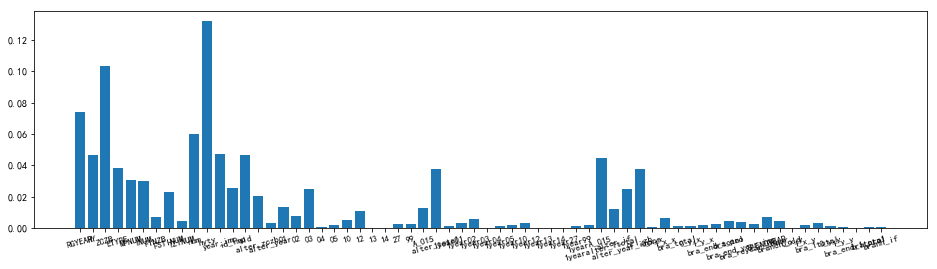

In [14]:
data_train = pd.read_csv('data_train.csv',encoding='gb2312')
from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.metrics import f1_score
from sklearn.cross_validation import train_test_split

targets = data_train['TARGET']
train_data = data_train.drop(labels=['EID','TARGET'],axis=1)
#  划分样本集
train_x,test_x,train_y,test_y = train_test_split(train_data,targets,test_size=0.5,random_state=66)
# 设置参数
gbdt = GradientBoostingClassifier(loss='exponential',n_estimators=20,max_depth=7)
# 训练
gbdt.fit(train_x, train_y)
# 预测
pre_y = gbdt.predict_proba(test_x)[:,1]
pre_y_categ = gbdt.predict(test_x)
# 计算auc
fpr, tpr, thresholds = metrics.roc_curve(test_y, pre_y)
auc=metrics.auc(fpr, tpr)
f1 = metrics.f1_score(test_y,pre_y_categ)
print("AUC得分为：")
print(auc)
print('f1-score为：')
print(f1)
# 画出特征重要性图
features = list(train_data.columns)
feature_important = gbdt.feature_importances_
plt.figure(figsize=(16,4))
plt.bar(np.arange(len(features)),feature_important)
plt.xticks(np.arange(len(features)),features,fontsize=9,rotation=15)
plt.show()

# 随机深林、KNN、朴素贝叶斯、逻辑回归

In [38]:
from sklearn import svm
from sklearn import metrics
from sklearn.externals import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB,MultinomialNB
from sklearn.linear_model import LogisticRegression

targets = data_train['TARGET']
train_data = data_train.drop(labels=['EID','TARGET'],axis=1)
#  划分样本集
train_x,test_x,train_y,test_y = train_test_split(train_data,targets,test_size=0.25,random_state=66)

def benchmark(clf):
    print('_' * 80)
    print("Training: ")
    clf.fit(train_x,train_y)
    # print("train time is %f"% train_time)

    # 预测
    pre_y = clf.predict_proba(test_x)[:,1]
    pre_y_categ = clf.predict(test_x)
    # 计算auc
    fpr, tpr, thresholds = metrics.roc_curve(test_y, pre_y)
    auc=metrics.auc(fpr, tpr)
    f1 = metrics.f1_score(test_y,pre_y_categ)

    clf_descr = str(clf).split('(')[0]
    return auc, f1

results = []
clf_names = []

for clf,name in ((KNeighborsClassifier(n_neighbors=3),"KNN"),
                (RandomForestClassifier(n_estimators=200,max_features='log2'),"RandomForest"),
                (BernoulliNB(alpha=0.01),"BernoulliNB"),
                (LogisticRegression(penalty='l2',class_weight ={'1':4}),'Logistic')):
    results.append(benchmark(clf))
    clf_names.append(name)
    
results = [[x[i] for x in results] for i in range(2)]
auc, f1 = results

indices = np.arange(len(auc))

plt.figure(figsize=(12,8))
plt.title('模型对比')
plt.barh(indices,auc,0.2,label='auc',color='r')
plt.barh(indices+0.3,f1,0.2,label='f1',color='g')

plt.yticks(())
plt.legend(loc='best')
for i,c in zip(indices, clf_names):
    plt.text(-0.3,i,c,fontsize=12)
plt.show()

In [29]:
data_train.head()

,EID,RGYEAR,HY,ZCZB,ETYPE,MPNUM,INUM,FINZB,FSTINUM,TZINUM,...,inv_ZP03,inv_recruit_tot,inv_re_month,inv_ZB_pro,inv_dificit,inv_end_if,inv_endyear_impor,inv_dif_wei,invest_if,TARGET
0,32741,2000,87,100.0,7,1.0,3.0,0.0,2.0,0.0,...,0.0,0.0,-20.0,250.0,0.0,0.0,0.168155,0.0,1,0.0
1,294220,2003,51,50.0,7,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0,0.0
2,10526,2013,75,100.0,7,1.0,2.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0,0.0
3,237382,2014,75,9900.0,7,3.0,4.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0,1.0
4,473535,2008,75,50.0,7,3.0,5.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0,1.0


In [17]:
?GradientBoostingClassifier()

# 深度深林

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn import metrics

from sklearn import preprocessing

os.chdir("C:/Users/Ma/Desktop/document/企业经营退出风险预测/analysis")
data_train = pd.read_csv('data_train.csv',encoding='gb2312')

from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import f1_score
from sklearn.cross_validation import train_test_split
from GCForest import gcForest

targets = data_train['TARGET']
train_data = data_train.drop(labels=['TARGET'],axis=1)
train_data = np.array(train_data)
# = PolynomialFeatures(2)
#train_data = poly.fit_transform(train_data)

#  划分样本集
train_x,test_x,train_y,test_y = train_test_split(train_data,targets,test_size=0.5,random_state=66)

gcf = gcForest(shape_1X=203, window=2, tolerance=0.0)
gcf.fit(train_x,train_y)
# 预测
pre_y = gcf.predict_proba(test_x)[:,1]
pre_y_categ = gcf.predict(test_x)
# 计算auc
fpr, tpr, thresholds = metrics.roc_curve(test_y, pre_y)
auc=metrics.auc(fpr, tpr)
f1 = metrics.f1_score(test_y,pre_y_categ)
print("AUC得分为：")
print(auc)
print('f1-score为：')
print(f1)
# 画出特征重要性图
features = list(train_data.columns)
feature_important = gcf.feature_importances_
plt.figure(figsize=(16,4))
plt.bar(np.arange(len(features)),feature_important)
plt.xticks(np.arange(len(features)),features,fontsize=10,rotation=15)
plt.show()

Slicing Sequence...
Training MGS Random Forests...


In [3]:
from GCForest import gcForest
?gcForest()